<a href="https://colab.research.google.com/github/pavvipoo/git/blob/main/waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:07<00:00, 62.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


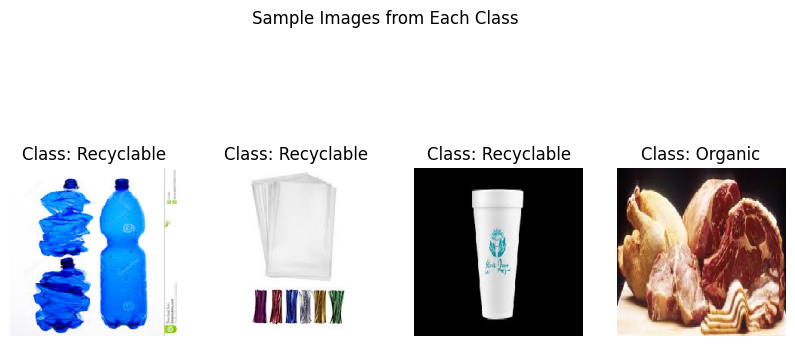

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import os


base_dir = path
train_dir = os.path.join(base_dir, "DATASET/TRAIN")
test_dir = os.path.join(base_dir, "DATASET/TEST")

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')


test_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
plt.figure(figsize=(10, 5))
for i in range(4):
  image,label=next(train_data)
  plt.subplot(1,4,i+1)
  plt.imshow(image[0])
  plt.title("Class: "+ ("Organic" if label[0]==0 else "Recyclable"))
  plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()


In [6]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
mobilenet_model.tarinable= False

model= tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)
model.save('mobilenet_waste_classifier.h5')
loss,accuracy=model.evaluate(test_data)
print("Model Accuracy:",accuracy)

Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 115s 163ms/step - accuracy: 0.9367 - loss: 0.1765 - val_accuracy: 0.5823 - val_loss: 2.9592
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 104s 147ms/step - accuracy: 0.9413 - loss: 0.1557 - val_accuracy: 0.7136 - val_loss: 1.3679


706/706 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.7139 - loss: 1.3659
Model Accuracy: 0.7135702967643738


706/706 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.55      0.01      0.03     12565
  Recyclable       0.44      0.99      0.61      9999

    accuracy                           0.44     22564
   macro avg       0.50      0.50      0.32     22564
weighted avg       0.50      0.44      0.28     22564

Confusion Matrix:
 [[  161 12404]
 [  133  9866]]


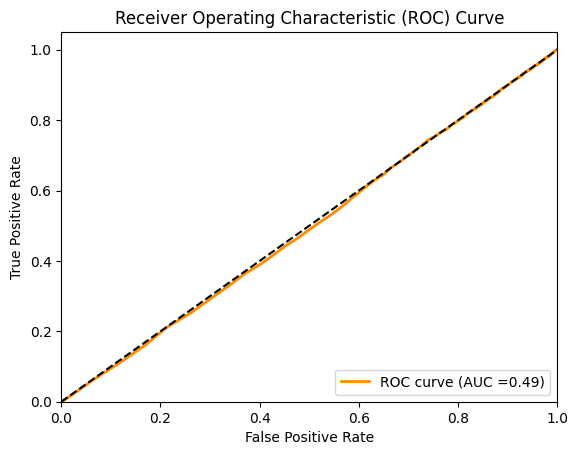

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_pred_prob= model.predict(test_data).flatten()
y_pred=(y_pred_prob>0.5).astype(int)
y_true = test_data.classes

print("Classification Report:\n",classification_report(y_true,y_pred,target_names=['Organic','Recyclable']))

conf_matrix = confusion_matrix(y_true,y_pred)
print("Confusion Matrix:\n",conf_matrix)

fpr,tpr,_=roc_curve(y_true,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC ={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


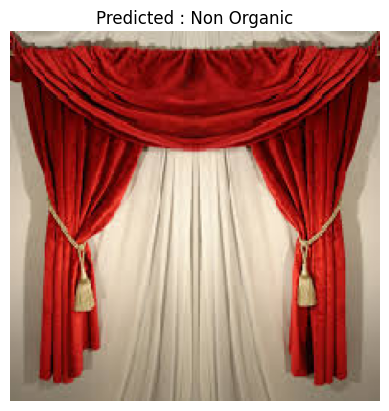

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model_path='/content/mobilenet_waste_classifier.h5'
test_image_path="/content/R_10000.jpg"

model = tf.keras.models.load_model(model_path)

test_img=load_img(test_image_path,target_size=(224,224))
test_image_array=img_to_array(test_img)/255.0
test_image_array=np.expand_dims(test_image_array,axis=0)

predicted_prob=model.predict(test_image_array)[0][0]
predicted_class='Organic' if predicted_prob<0.5 else 'Non Organic'

plt.imshow(test_img)
plt.title(f"Predicted : {predicted_class}")
plt.axis('off')
plt.show()

